In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [5]:

file_name = 'cc_info.csv'
cc = pd.read_csv(file_name)
cc.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


,BALANCE,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX
0,40.900749,95.40,0.00,0.000000,0.166667,0.000000,2
1,3202.467416,0.00,0.00,6442.945483,0.000000,0.250000,0
2,2495.148862,773.17,773.17,0.000000,1.000000,0.000000,12
3,1666.670542,1499.00,1499.00,205.788017,0.083333,0.083333,1
4,817.714335,16.00,16.00,0.000000,0.083333,0.000000,1


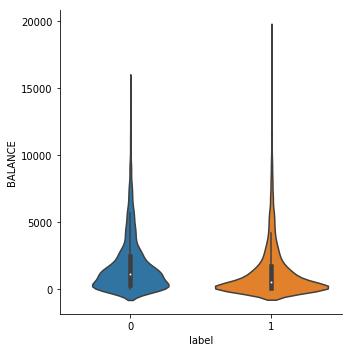

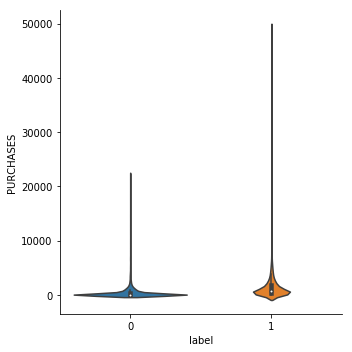

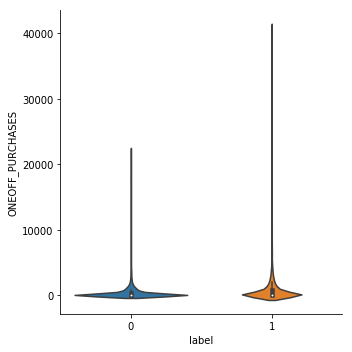

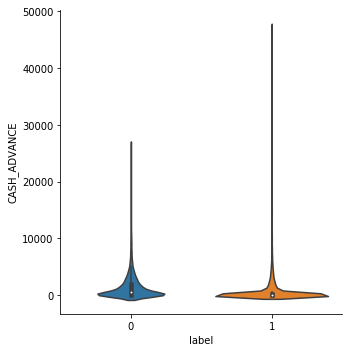

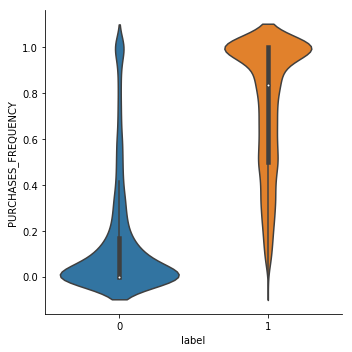

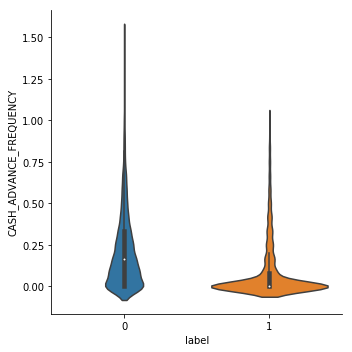

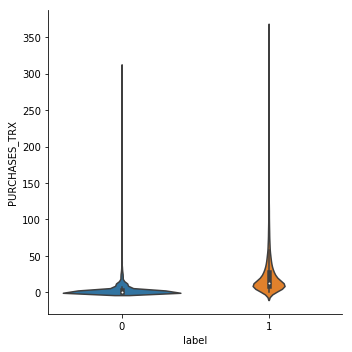

In [108]:
# predict who uses installment purchases, based on purchases and oneoff-challenges
label_var = 'INSTALLMENTS_PURCHASES'
cc['label'] = cc[label_var].apply(lambda x: 1 if x>0 else 0)
np.mean(cc['label']) # 56% of individuals have installment purchases 


# features that will help determine who will make installment purchases 
feature_vars = ['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX']

for var in feature_vars:
    sns.catplot(x = 'label', y = var, data= cc, kind= 'violin' )
    
# def boxplot(data, var):
#     plt.boxplot(data)
#     print(var)
#     plt.show()

# for var in feature_vars:
#     is_true = cc['label']==1
#     is_false = cc['label']==0
#     boxplot([cc[var][is_true], cc[var][is_false]], var)

label = cc['label']
features = cc[feature_vars]
features.head()

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 

# init scaler 
scaler = MinMaxScaler()


def scaleData(scaler, features):
    scaler.fit(features) 
    cols = features.columns
    features[cols] = scaler.transform(features[cols])
    return features 
    

def genPCA(scaled_data):
    pca = PCA(n_components=2)
    scaled_pca = pca.fit_transform( scaled_data)
    return scaled_pca


scaled_data = scaleData(scaler, features)
data_pca = genPCA(scaled_data)



# for col in scaled_data:
#     print(col)
#     nullnum = np.sum(scaled_data[col].isnull())
#     print(nullnum)

8950
8950


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

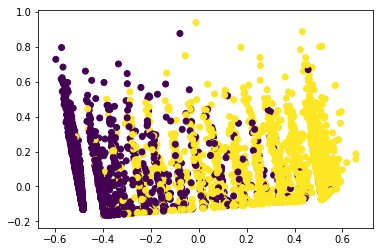

In [59]:
import matplotlib.pyplot as plt

def plotPCA(data_pca, label):
    plt.scatter(x = data_pca[:,0], y= data_pca[:,1], c = label)
    

plotPCA(data_pca, label)

In [65]:
# split data into training and testing 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data, label, test_size = 0.2 )



assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)
print('train len: %f' %(len(x_train)))
print('test len: %f' %(len(x_test)))


train len: 7160.000000
test len: 1790.000000


In [79]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier 
from sklearn.metrics import auc, roc_curve, accuracy_score, precision_score, recall_score


def trainEvalModel(model, x_train, x_test, y_train, y_test):
    res= {}
    fitted = model.fit(x_train, y_train)
    y_pred = fitted.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    res['auc']  = auc(fpr, tpr)
    res['accuracy'] = accuracy_score(y_test, y_pred)
    res['precision'] = precision_score(y_test, y_pred)
    res['recall'] = recall_score(y_test, y_pred)
    return res


    
logistic = LogisticRegression()   
boost = AdaBoostClassifier() 
forest = RandomForestClassifier() 
svc = SVC()   

print('logistic')
print(trainEvalModel(logistic, x_train, x_test, y_train, y_test) )
print('boost')
print(trainEvalModel(boost, x_train, x_test, y_train, y_test) )
print('forest')
print(trainEvalModel(forest, x_train, x_test, y_train, y_test) )
print('svc')
print(trainEvalModel(svc, x_train, x_test, y_train, y_test) )




logistic
{'auc': 0.876148768723026, 'accuracy': 0.8737430167597765, 'precision': 0.9135021097046413, 'recall': 0.8574257425742574}
boost


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'auc': 0.9504188880426504, 'accuracy': 0.9519553072625698, 'precision': 0.9529411764705882, 'recall': 0.9623762376237623}
forest
{'auc': 0.952982990606753, 'accuracy': 0.9541899441340782, 'precision': 0.9566929133858267, 'recall': 0.9623762376237623}
svc


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'auc': 0.8778243208936278, 'accuracy': 0.8815642458100559, 'precision': 0.8858800773694391, 'recall': 0.906930693069307}


In [102]:
fitted = forest.fit(x_train, y_train)
y_pred = fitted.predict(x_test)
test_pca = genPCA(x_test)


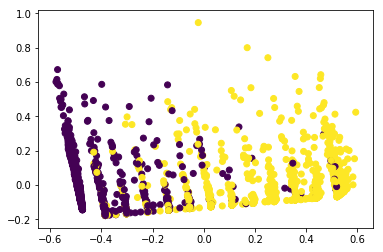

In [103]:
plotPCA(test_pca, y_pred)


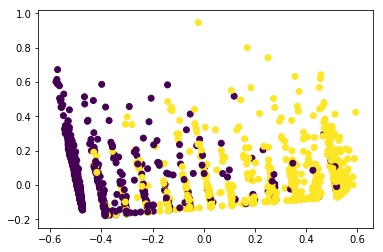

In [89]:
plotPCA(test_pca, y_test)